In [ ]:
import os
from time import sleep
from mistralai import Mistral
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


api_key = ""

client = Mistral(api_key=api_key)

model = client.models.retrieve(
    model_id=""
)

y_true=[]
inputs = []
for filename in os.listdir("validation"):
    if filename.endswith(".qasm"):
        with open(os.path.join("validation", filename), "r") as file:
            read_file = file.read()
            escaped_string = read_file.replace("\n\n","\n").replace("\n", "\\n").replace("\"", "'")
            if(len(escaped_string)<10000):
                y_true.append("malicious" if "malicious" in filename else "benign")
                inputs.append(escaped_string)

classifier_responses = [None] * len(inputs)
for i in range(len(inputs)):
    classifier_responses[i] = client.chat.complete(
        model = model.id,
        messages = [
            {
                "role": "user",
                "content": "Classify this program as malicious or benign: " + inputs[i].replace("\"","'"),
            },
        ]
    )
    print("sleeping")# S
    sleep(5)  

y_pred = []


sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
sleeping
s

In [28]:
print("Classifier responses:")
for i in range(len(classifier_responses)):
    print(classifier_responses[i])

Classifier responses:
id='65a1e6aa16ab4c87ab7bc01c39792030' object='chat.completion' model='ft:codestral-latest:ca334848:20250429:351d6549' usage=UsageInfo(prompt_tokens=410, completion_tokens=3, total_tokens=413) created=1745898130 choices=[ChatCompletionChoice(index=0, message=AssistantMessage(content='benign', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]
id='5aecef7eedec47f18fb5566f76ec63bd' object='chat.completion' model='ft:codestral-latest:ca334848:20250429:351d6549' usage=UsageInfo(prompt_tokens=3399, completion_tokens=3, total_tokens=3402) created=1745898140 choices=[ChatCompletionChoice(index=0, message=AssistantMessage(content='benign', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]
id='42ae3a6a03cc409e854078e9237ffc3f' object='chat.completion' model='ft:codestral-latest:ca334848:20250429:351d6549' usage=UsageInfo(prompt_tokens=202, completion_tokens=3, total_tokens=205) created=1745898146 choices=[ChatCompletionChoice(ind

[ChatCompletionResponse(id='65a1e6aa16ab4c87ab7bc01c39792030', object='chat.completion', model='ft:codestral-latest:ca334848:20250429:351d6549', usage=UsageInfo(prompt_tokens=410, completion_tokens=3, total_tokens=413), created=1745898130, choices=[ChatCompletionChoice(index=0, message=AssistantMessage(content='benign', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]), ChatCompletionResponse(id='5aecef7eedec47f18fb5566f76ec63bd', object='chat.completion', model='ft:codestral-latest:ca334848:20250429:351d6549', usage=UsageInfo(prompt_tokens=3399, completion_tokens=3, total_tokens=3402), created=1745898140, choices=[ChatCompletionChoice(index=0, message=AssistantMessage(content='benign', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]), ChatCompletionResponse(id='42ae3a6a03cc409e854078e9237ffc3f', object='chat.completion', model='ft:codestral-latest:ca334848:20250429:351d6549', usage=UsageInfo(prompt_tokens=202, completion_tokens=3, total

/var/folders/b7/jhlf1dbs0v3855t9tsdb6z100000gn/T/ipykernel_11339/2471504409.py:18: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df_cm = pd.DataFrame(cm, index=pd.unique(y_true), columns=pd.unique(y_true))


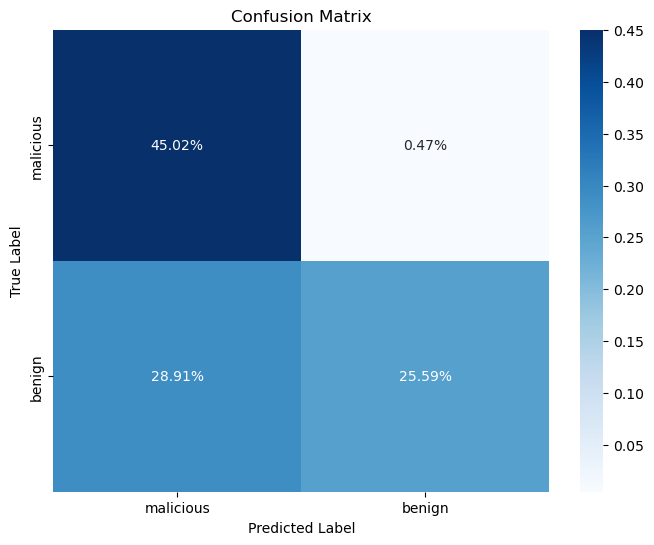

In [37]:
y_pred = []
for i in range(len(classifier_responses)):
    if classifier_responses[i].choices[0].message.content=="malicious":
        y_pred.append("malicious")
    else:
        y_pred.append("benign")


import numpy as np

print(classifier_responses)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm=cm/cm.sum()  # Normalize by row (i.e., by the number of samples in each class)

# Create DataFrame
df_cm = pd.DataFrame(cm, index=pd.unique(y_true), columns=pd.unique(y_true))

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt=".2%", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()